In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [3]:
data = pd.read_csv('./gun_violence_dataset/people_dataset.csv', index_col=0)

data.head()

,Age,Age_group,Gender,Incident_id,State,City_or_county,N_killed,N_injured,Average_age,N_victims,N_suspects,Stolen_gun_involved,Minors_involved,Subject-Suspect,Victim,Arrested,Injured,Killed,Unharmed
0,20.0,Adult 18+,Male,461105,Pennsylvania,Mckeesport,0,4,20.0,4.0,1.0,Unknown,False,0,1,1,0,0,0
5,20.0,Adult 18+,Male,460726,California,Hawthorne,1,3,20.0,4.0,1.0,Unknown,False,0,1,0,0,1,0
10,25.0,Adult 18+,Male,478855,Ohio,Lorain,1,3,31.2,3.0,2.0,Unknown,False,1,0,1,1,0,1
11,31.0,Adult 18+,Male,478855,Ohio,Lorain,1,3,31.2,3.0,2.0,Unknown,False,1,0,1,0,0,1
12,33.0,Adult 18+,Male,478855,Ohio,Lorain,1,3,31.2,3.0,2.0,Unknown,False,0,1,0,0,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217671 entries, 0 to 392322
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  217671 non-null  float64
 1   Age_group            217671 non-null  object 
 2   Gender               217671 non-null  object 
 3   Incident_id          217671 non-null  int64  
 4   State                217671 non-null  object 
 5   City_or_county       217671 non-null  object 
 6   N_killed             217671 non-null  int64  
 7   N_injured            217671 non-null  int64  
 8   Average_age          217671 non-null  float64
 9   N_victims            217671 non-null  float64
 10  N_suspects           217671 non-null  float64
 11  Stolen_gun_involved  217671 non-null  object 
 12  Minors_involved      217671 non-null  bool   
 13  Subject-Suspect      217671 non-null  int64  
 14  Victim               217671 non-null  int64  
 15  Arrested         

In [5]:
data.describe()

,Age,Incident_id,N_killed,N_injured,Average_age,N_victims,N_suspects,Subject-Suspect,Victim,Arrested,Injured,Killed,Unharmed
count,217671.000000,2.176710e+05,217671.000000,217671.000000,217671.000000,217671.000000,217671.000000,217671.000000,217671.000000,217671.000000,217671.000000,217671.000000,217671.000000
mean,29.558361,5.657282e+05,0.474432,0.634908,29.548321,1.146942,1.305985,0.430117,0.569883,0.323860,0.314649,0.235957,0.413693
std,13.119984,2.886351e+05,1.180922,1.407679,11.928428,2.222590,1.774365,0.495093,0.495093,0.467949,0.464377,0.424596,0.492496
min,0.000000,9.211700e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,3.234030e+05,0.000000,0.000000,21.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,5.505110e+05,0.000000,0.000000,26.625000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,8.167390e+05,1.000000,1.000000,35.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,311.000000,1.083472e+06,50.000000,53.000000,209.000000,102.000000,63.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Correlation between people

<AxesSubplot:>

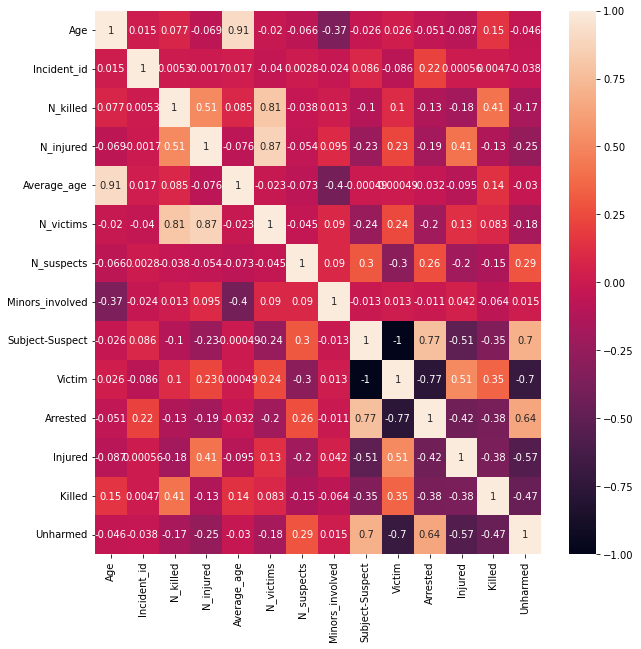

In [6]:
# Correlation matrix for numeric columns
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True)

# We can see the high correlation between victims and subject-suspect, also victims tend not to be unharmed, as well as subject-suspects 
# seems to usually be unharmed and arrested

# Distributions

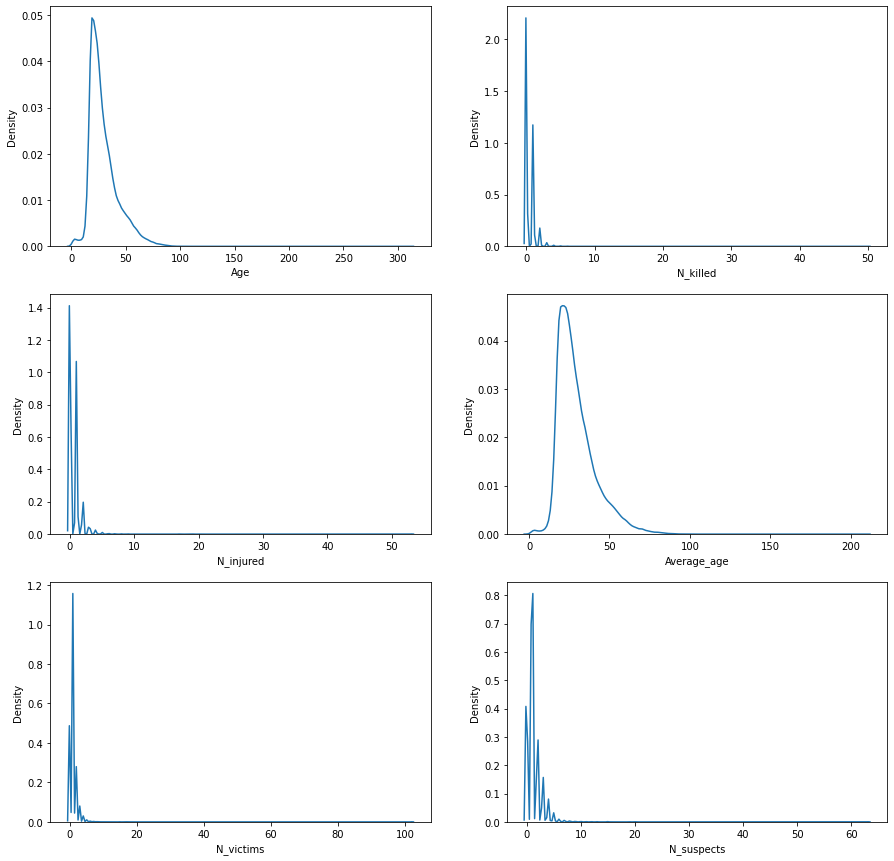

In [9]:
fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(3, 2, 1)
sns.kdeplot(data.Age)

ax = fig.add_subplot(3, 2, 2)
sns.kdeplot(data.N_killed)

ax = fig.add_subplot(3, 2, 3)
sns.kdeplot(data.N_injured)

ax = fig.add_subplot(3, 2, 4)
sns.kdeplot(data.Average_age)

ax = fig.add_subplot(3, 2, 5)
sns.kdeplot(data.N_victims)

ax = fig.add_subplot(3, 2, 6)
sns.kdeplot(data.N_suspects)

plt.show()

# Multi-variable analysis

In [15]:
# We take the suspects and analyse the mean number of victims with respect to the age group of 
# the suspect and whether or not there where minor involved 
data[data['Subject-Suspect'] == 1].pivot_table('N_victims', 'Minors_involved', 'Age_group', 'mean')

# The next result suggests that the number of victims is higher when there are minors involved in all cases

Age_group,Adult 18+,Child 0-11,Teen 12-17
Minors_involved,,,
False,0.476535,NaN,NaN
True,1.117389,0.714286,0.613636


In [16]:
# We take the suspects and analyse the mean number of fatal victims with respect to the age group of 
# the suspect and whether or not there where minor involved 
data[data['Subject-Suspect'] == 1].pivot_table('N_killed', 'Minors_involved', 'Age_group', 'mean')

# The number of fatal victims is also higher when there are minors involved

Age_group,Adult 18+,Child 0-11,Teen 12-17
Minors_involved,,,
False,0.322991,NaN,NaN
True,0.501133,0.248571,0.289245


In [18]:
# We take the suspects and analyse the mean number of victims with respect to the age group of 
# the suspect and their sex 
data[data['Subject-Suspect'] == 1].pivot_table('N_victims', 'Gender', 'Age_group', 'mean')

# There does not seem to be any correlation

Age_group,Adult 18+,Child 0-11,Teen 12-17
Gender,,,
Female,0.492054,0.735294,0.609223
Male,0.533029,0.712025,0.613874
